In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def chart_data(df, bins, xdist, yvar, clas, position): #df: dataframe, bins: number of bins, xdist: distance variable, yvar: classification variable, clas: string with classification categories, position: X and Y label position
    df = df.sort_values(by=[xdist])
    
    # calculate and create a list with the probability values for each value
    prob = 100 / len(df[xdist])
    df['Prob'] = prob
    
    # generate the X values for the chart
    xintervals = math.ceil(df[xdist].max()) #calculate the number of intervals
    xbin = df[xdist].max() / bins #calculate the size of each bin
    begin = xbin #begining of X axis
    x = []
    while begin < xintervals:
        x.append(begin)
        begin = begin + xbin
    
    # generate the Y lists for the chart
    MEAS = []
    IND = []
    INF = []
    i = 0
    while i < len(x):
        if i == 0:
            l = df.loc[(df[xdist] > i) & (df[xdist] < x[0])]
            MEAS.append(l['Prob'].loc[l[yvar] == clas[0]].sum())
            IND.append(l['Prob'].loc[l[yvar] == clas[1]].sum())
            INF.append(l['Prob'].loc[l[yvar] == clas[2]].sum())
            i = i + 1
        else:
            l = df.loc[(df[xdist] > x[i-1]) & (df[xdist] < x[i])]
            MEAS.append(l['Prob'].loc[l[yvar] == clas[0]].sum())
            IND.append(l['Prob'].loc[l[yvar] == clas[1]].sum())
            INF.append(l['Prob'].loc[l[yvar] == clas[2]].sum())
            i = i + 1
    
    # chart generation
    v=df[xdist]

    string_info=f'Distance (m)\n\nMean: {v.mean():.2f}\nStd. dev.: {v.std():.2f}\nMinimum: {v.min():.2f}\nMaximum: {v.max():.2f}\nn: {v.count()}'

    plt.figure(figsize = (7, 5))
    plt.bar(x, MEAS, color='r', edgecolor = 'black')
    plt.bar(x, IND, bottom=MEAS, color='g', edgecolor = 'black')
    plt.bar(x, INF, bottom=[MEAS[j] + IND[j] for j in range(len(MEAS))], color='b', edgecolor = 'black')
    plt.xlabel("Distance (m)") 
    plt.ylabel("Frequency (%)")
    plt.legend(["Measured", "Indicated", "Inferred"]) 
    plt.title("Distance Histogram") 
    plt.text(position[0], position[1], string_info, fontsize=12)
    plt.xlim([0, xintervals + 2])
    plt.show()

In [3]:
df = pd.read_csv('bm_dist_class.csv')
df

,Min Dist,Classification
0,0.075791,MEAS
1,0.222145,MEAS
2,0.261512,MEAS
3,0.277510,MEAS
4,0.309167,MEAS
...,...,...
13606,30.481064,INF
13607,30.505543,INF
13608,30.514164,INF
13609,30.922736,INF


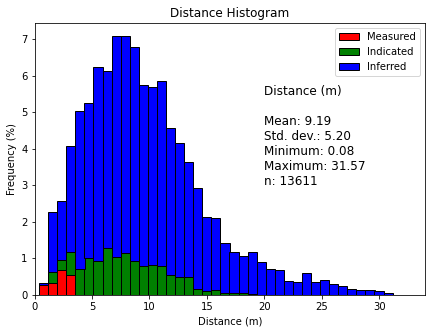

In [4]:
values = chart_data(df, 40, 'Min Dist', 'Classification', ['MEAS', 'IND', 'INF'], [20, 3])